# Random Forest Regression

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
df = pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Split the dataset into input set and output

In [3]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2:].values

# Import the RF class from sklearn.ensemble

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Build the object of the class. Choose the parameters by yourself. Refer to the documentation in order to get more info about the parameters

In [5]:
reg = RandomForestRegressor(bootstrap=False, max_depth=15, n_estimators=3)

# Fit the X and y into the regressor

In [6]:
reg.fit(X, y)
y_pred = reg.predict(X)
print(reg.predict(6.5))
print("-----\n",y_pred)

[150000.]
-----
 [  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


# you'll get this

### RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
###           max_features='auto', max_leaf_nodes=None,
###           min_impurity_decrease=0.0, min_impurity_split=None,
###           min_samples_leaf=1, min_samples_split=2,
###           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
###           oob_score=False, random_state=0, verbose=0, warm_start=False)

# Predicting a new result on level 6.5
### y_pred = ......

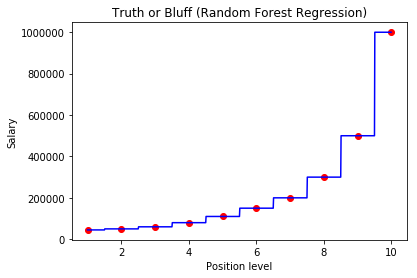

In [7]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Take a look at your regressor's content. You should obtain this:

### treez = ......

In [8]:
treez = reg.estimators_

In [9]:
treez

[DecisionTreeRegressor(criterion='mse', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1683099022, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1445549780, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=166022769, splitter='best')]

In [10]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [11]:
for tree in treez:
    export_graphviz(tree, out_file=dot_data, max_depth=10,filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [12]:
len(graph)

3

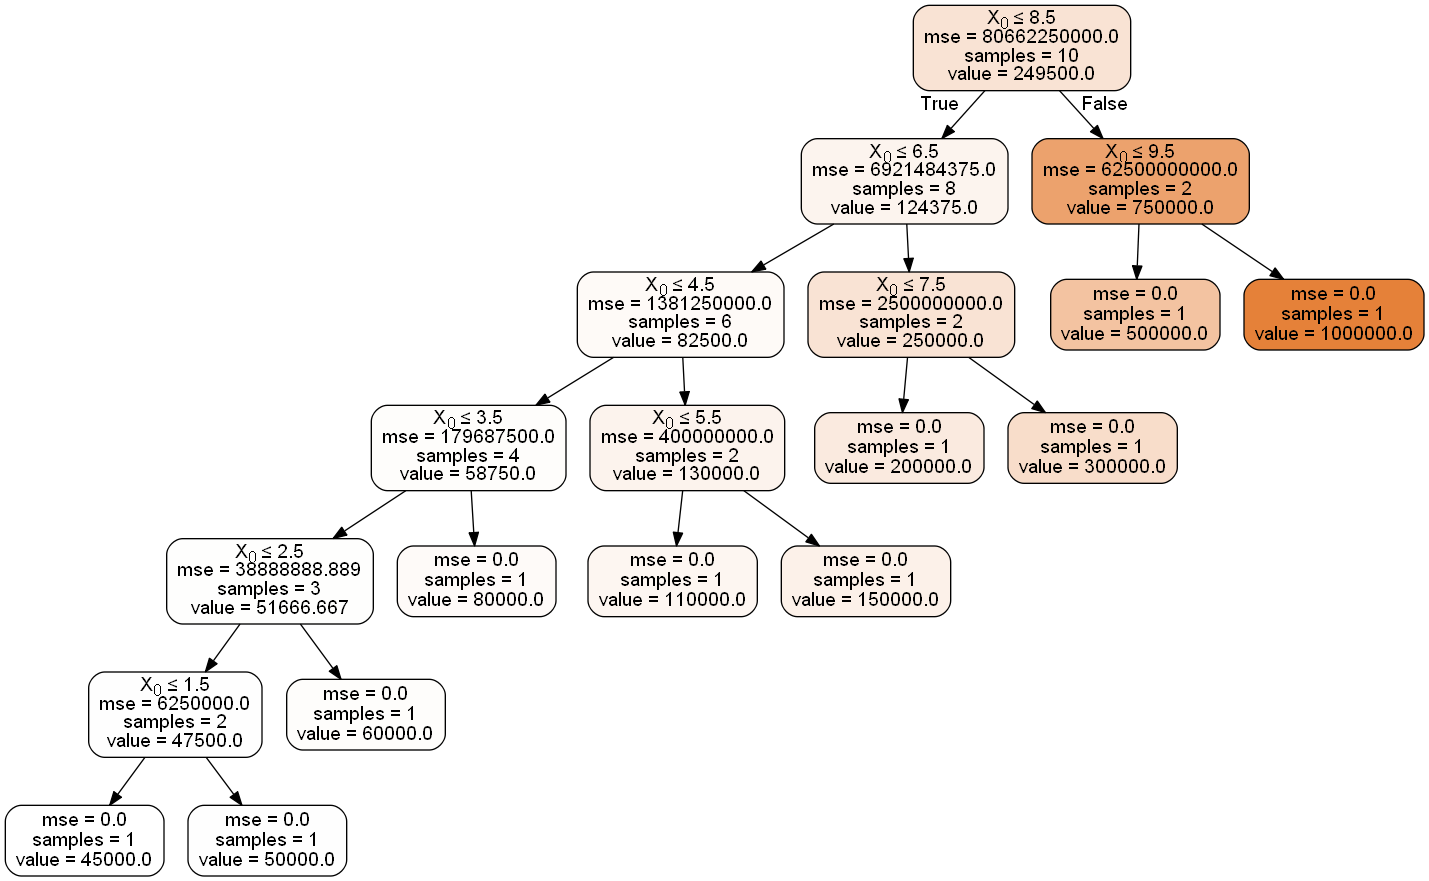

In [13]:
Image(graph[0].create_png())

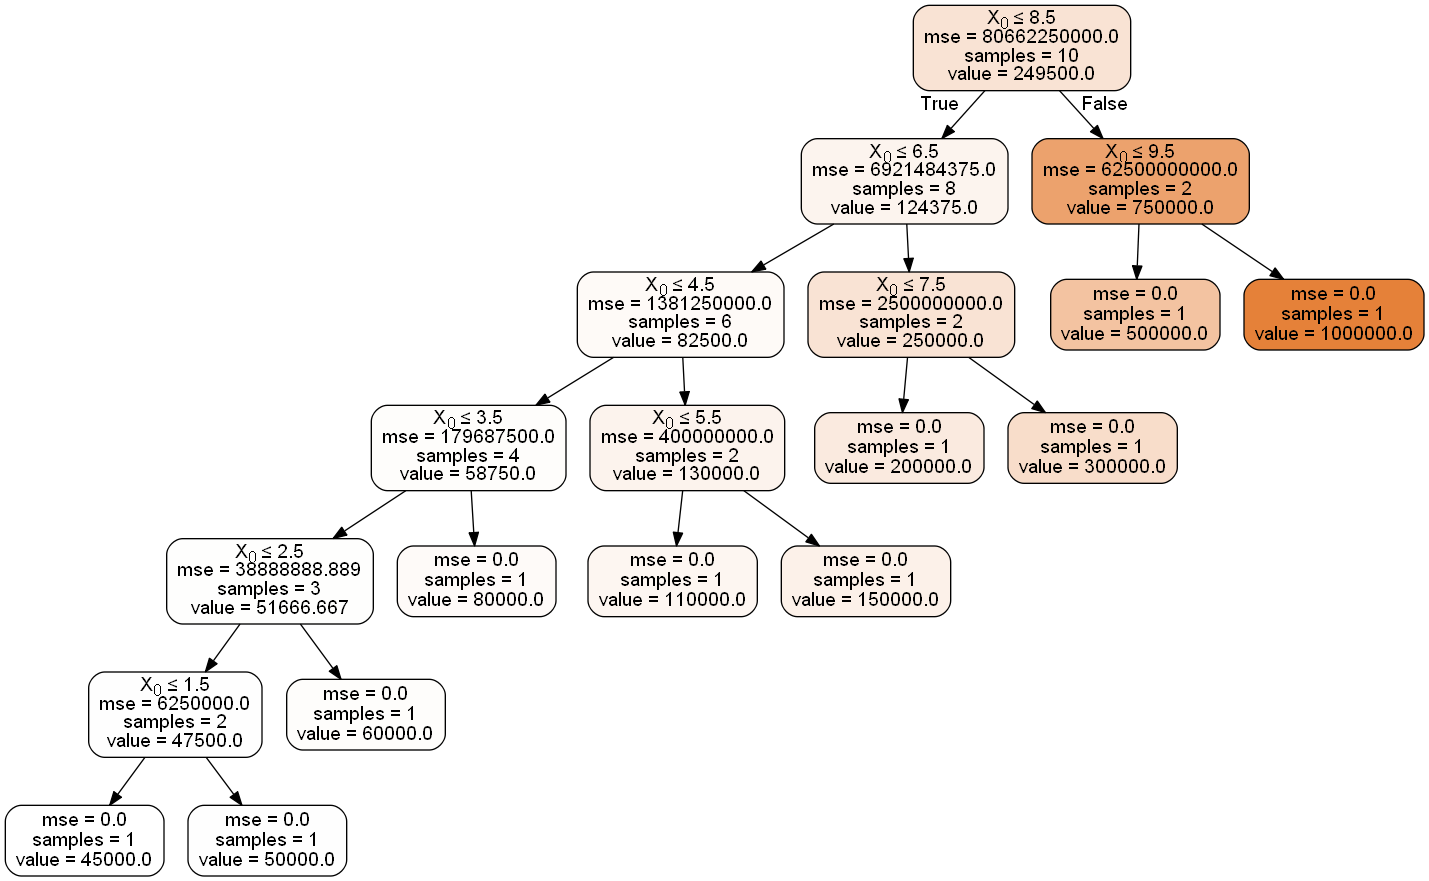

In [14]:
Image(graph[1].create_png())

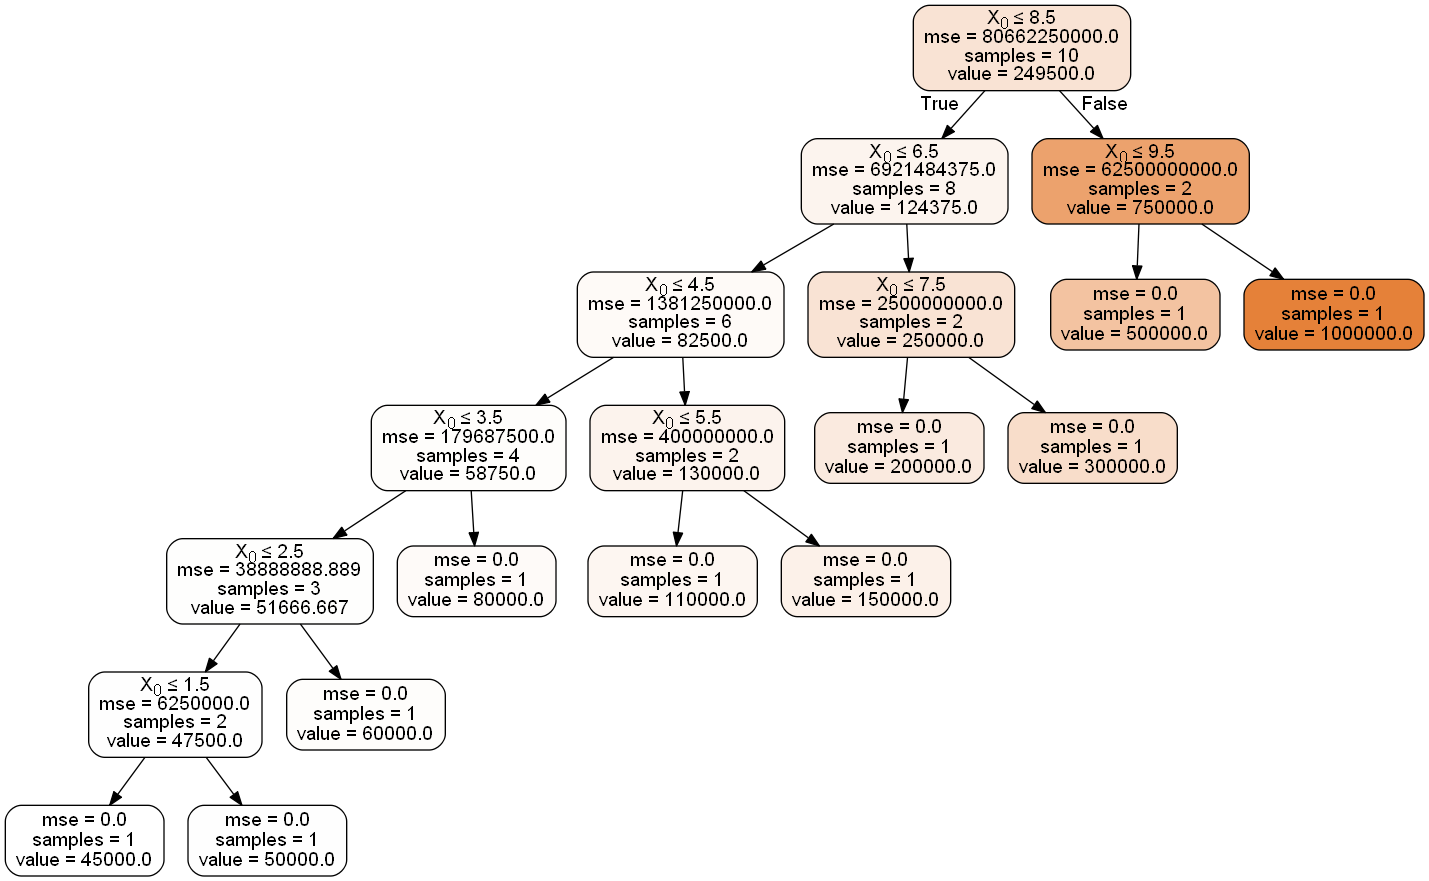

In [15]:
Image(graph[2].create_png())